## Import

In [ ]:
install.packages(c("ggraph", "ggsci", "here", "igraph", "plotly", "tidygraph", "tidyverse"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘later’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘graphlayouts’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’




In [ ]:
# draw graph with igraph
library(ggraph)
library(ggsci)
library(here)
library(igraph)  # make network graph, caculate metrics
library(plotly)
library(RColorBrewer)
library(readxl)
library(tidygraph)
library(tidyverse)  # tidyverse to manipulate data
# for building network and visualization already included in tidygraph

## Read data

In [ ]:
filename <- here()

In [ ]:
# read the excel datasheet and store diffrent sheet data to the data.frame
ppi_df <- read_csv(here(filename, "/Pain PPIs.csv"), col_names = c("Key",
    "From", "Type", "To"), skip = 1)


── Column specification ────────────────────────────────────────────────────────
cols(
  Key = col_character(),
  From = col_character(),
  Type = col_character(),
  To = col_character()
)




In [ ]:
head(ppi_df)
# inspect head 6 rows of data

Key,From,Type,To
<chr>,<chr>,<chr>,<chr>
7274o75001,CNTN1,Binding,SCN2A
491-130786,IL4,Negative Regulation,Ptger2
12920+2539,TRPV1,Positive Regulation,VIP
105263+37367,CALCA,Positive Regulation,NPR1
105263+502,CALCA,Positive Regulation,IL6
480*3844,IL1A,Regulation,FOS


In [ ]:
degs_df <- read_csv(here(filename, "forGO_all.csv"), col_names = c("Gene",
    "LogFC"), skip = 1)
degs_df <- degs_df %>%
    mutate(Gene = str_to_upper(Gene))
head(degs_df)


── Column specification ────────────────────────────────────────────────────────
cols(
  Gene = col_character(),
  LogFC = col_double()
)




Gene,LogFC
<chr>,<dbl>
GM26901,1.0954985
1700034P13RIK,3.4385196
GM39590,2.8589196
PI15,0.5589248
4933424G06RIK,0.9383129
GM39633,0.9589618


In [ ]:
select <- (ppi_df$From %in% degs_df$Gene) | ppi_df$To %in% degs_df$Gene
ppi_df[select, ]

Key,From,Type,To
<chr>,<chr>,<chr>,<chr>
128039+838,CRP,Positive Regulation,VCAM1
723-37368,POMC,Negative Regulation,OPRM1
20170+7383,ADRA2C,Positive Regulation,Ins1
4537-2245,PNOC,Negative Regulation,CCL2
20920o2515,CRHR1,Binding,UCN
3659+480,MMP9,Positive Regulation,IL1A
817*7924,SLC6A4,Regulation,S100A4
68536-2394,IFNA13,Negative Regulation,TAC1
723o2556,POMC,Binding,YY1


## Network metrics

In [ ]:
eg <- graph.data.frame(ppi_df[select, c(2, 4)], directed = TRUE)
# initialize the graph with igraph graph.data.frame() function, undirected
# graph
class(eg)
# inspect the eg graph
eg

[1] "igraph"

IGRAPH 7fa61ed DN-- 137 141 -- 
+ attr: name (v/c)
+ edges from 7fa61ed (vertex names):
 [1] CRP    ->VCAM1  POMC   ->OPRM1  ADRA2C ->Ins1   PNOC   ->CCL2  
 [5] CRHR1  ->UCN    MMP9   ->IL1A   SLC6A4 ->S100A4 IFNA13 ->TAC1  
 [9] POMC   ->YY1    MMP2   ->MMP9   CX3CR1 ->MAPK14 BDNF   ->ARC   
[13] MAPK14 ->CX3CR1 PENK   ->POMC   CALCA  ->CCL2   COL4A2 ->LAMA1 
[17] POMC   ->CRH    SST    ->POMC   GRIN2B ->MMP9   ABAT   ->SST   
[21] ITGA1  ->VCAM1  NEUROD1->GAL    GHRH   ->GNRHR  POMC   ->GH1   
[25] POMC   ->Ins1   CCR5   ->CCL3L3 POMC   ->CCK    POMC   ->Ins1  
[29] MC1R   ->POMC   IL6    ->CX3CR1 POMC   ->IL6    NPVF   ->QRFPR 
+ ... omitted several edges

In [ ]:
diameter(eg)  # show the diameter of the graph

[1] 7

In [ ]:
edge_density(eg)  # show the density of the graph

[1] 0.007567626

In [ ]:
data.frame(degree(eg)) %>%
    arrange(-degree.eg.) %>%
    head(10)
data.frame(degree(eg)) %>%
    arrange(-degree.eg.) %>%
    tail(10)
# show the 3 nodes with most and least degree centrality

,degree.eg.
,<dbl>
POMC,3
MMP2,1
TMPO,1
CRHR1,1
BMP7,1
MMP9,1


,degree.eg.
,<dbl>
POMC,3
MMP2,1
TMPO,1
CRHR1,1
BMP7,1
MMP9,1


In [ ]:
data.frame(closeness(eg)) %>%
    arrange(-closeness.eg.) %>%
    head(10)
data.frame(closeness(eg)) %>%
    arrange(-closeness.eg.) %>%
    tail(10)
# show the 3 nodes with most and least closeness centrality

Warning message in closeness(eg):
“At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs”


,closeness.eg.
,<dbl>
MMP2,0.04000000
TMPO,0.04000000
CRHR1,0.04000000
BMP7,0.04000000
MMP9,0.03333333
POMC,0.03333333


Warning message in closeness(eg):
“At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs”


,closeness.eg.
,<dbl>
MMP2,0.04000000
TMPO,0.04000000
CRHR1,0.04000000
BMP7,0.04000000
MMP9,0.03333333
POMC,0.03333333


In [ ]:
data.frame(betweenness(eg)) %>%
    arrange(-betweenness.eg.) %>%
    head(10)
data.frame(betweenness(eg)) %>%
    arrange(-betweenness.eg.) %>%
    tail(10)
# show the 5 nodes with most and least betweenness centrality

,betweenness.eg.
,<dbl>
MMP2,0
TMPO,0
CRHR1,0
BMP7,0
MMP9,0
POMC,0


,betweenness.eg.
,<dbl>
MMP2,0
TMPO,0
CRHR1,0
BMP7,0
MMP9,0
POMC,0


In [ ]:
data.frame(eigen_centrality(eg)$vector) %>%
    arrange(-eigen_centrality.eg..vector) %>%
    head(10)
data.frame(eigen_centrality(eg)$vector) %>%
    arrange(-eigen_centrality.eg..vector) %>%
    tail(10)
# show the 5 nodes with most and least eigen centrality

,eigen_centrality.eg..vector
,<dbl>
POMC,1.0000000
PENK,0.4253290
CRH,0.4099173
Ins1,0.3107010
MC1R,0.3074380
CCK,0.2132783
CAMK2A,0.2049587
GH1,0.2049587
SST,0.1119875


,eigen_centrality.eg..vector
,<dbl>
CCL5,0
SCN2B,0
IL8,0
MAPK3,0
GDF15,0
CTSB,0
TRPV1,0
Nav1,0
OASL,0


## Basic circular network

In [ ]:
degs_df$Expression <- if_else(degs_df$LogFC <=0, "Down Regulation", "Up Regulation")
head(degs_df)

Gene,LogFC,Expression
<chr>,<dbl>,<chr>
GM26901,1.0954985,Up Regulation
1700034P13RIK,3.4385196,Up Regulation
GM39590,2.8589196,Up Regulation
PI15,0.5589248,Up Regulation
4933424G06RIK,0.9383129,Up Regulation
GM39633,0.9589618,Up Regulation


In [ ]:
deg_expression <- ppi_df[select, ] %>% left_join(degs_df, by=c("From" ="Gene")) %>% select(c(6))
deg_expression$Expression <- deg_expression$Expression %>% replace_na("No Chage")

head(deg_expression)

Expression
<chr>
No Chage
Up Regulation
Down Regulation
No Chage
Down Regulation
Down Regulation


In [ ]:
# create nodes data
nodes <- data.frame(V = unique(c(ppi_df[select, ]$From, ppi_df[select, ]$To)), stringsAsFactors = F)
# create edges data
edges <- ppi_df[select, c(2, 4)]
# after that, we can simply create graph dataframe using `graph_from_data_frame`
# function from `igraph` package.
network_ego <- graph_from_data_frame(d = edges, vertices = nodes, directed = TRUE) %>% 
    as_tbl_graph()

In [ ]:
E(network_ego)$Interaction <- as.character(ppi_df[select, ]$Type)
V(network_ego)$Expression <- as.character(deg_expression$Expression)

Warning message in vattrs[[name]][index] <- value:
“number of items to replace is not a multiple of replacement length”


In [ ]:
set.seed(101)
network_ego1 <- network_ego %>%
    mutate(community = as.factor(group_infomap())) %>%
    mutate(degree_c = centrality_degree()) %>%
    mutate(closeness_c = centrality_closeness(normalized = T)) %>%
    mutate(eigen = centrality_eigen(directed = F))
# group_louvain, group_infomap, group_optimal group_spinglass,
# group_edge_betweenness

Warning message in closeness(graph = graph, vids = V(graph), mode = mode, weights = weights, :
“At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs”


In [ ]:
network_ego1

# A tbl_graph: 137 nodes and 141 edges
#
# A directed multigraph with 22 components
#
# Node Data: 137 x 6 (active)
  name   Expression      community degree_c closeness_c    eigen
  <chr>  <chr>           <fct>        <dbl>       <dbl>    <dbl>
1 CRP    No Chage        5                1     0.00735 7.04e-10
2 POMC   Up Regulation   1               35     0.0106  1   e+ 0
3 ADRA2C Down Regulation 1                1     0.00735 3.18e- 2
4 PNOC   No Chage        1                2     0.00746 2.42e- 3
5 CRHR1  Down Regulation 1                2     0.0108  1.04e- 1
6 MMP9   Down Regulation 3                2     0.00752 4.81e- 6
# … with 131 more rows
#
# Edge Data: 141 x 3
   from    to Interaction        
  <int> <int> <chr>              
1     1    78 Positive Regulation
2     2    38 Negative Regulation
3     3    79 Positive Regulation
# … with 138 more rows

Warning message:
“ggrepel: 76 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


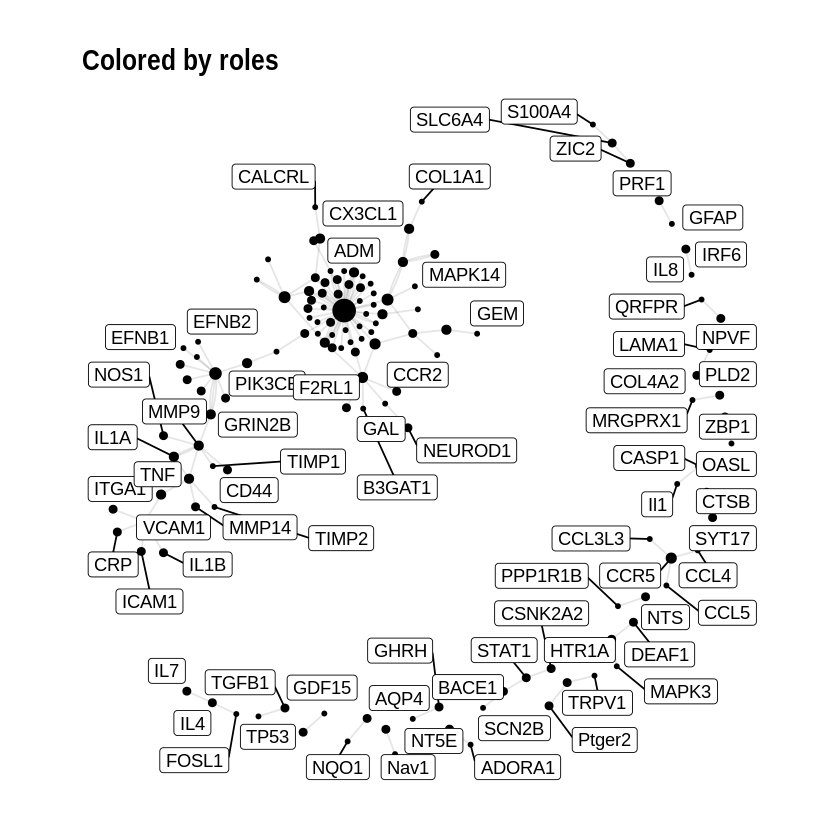

In [ ]:
network_ego1 %>%
    mutate(node_size = degree_c * 0.1) %>%
    ggraph(layout = "kk") + geom_edge_fan(alpha = 0.1) + geom_node_point(aes(size = node_size)) +
    geom_node_label(aes(label = name), max.overlaps = 10, repel = T, show.legend = T) +
    coord_fixed() + theme_graph() + theme(legend.position = "none") + labs(title = "Colored by roles")

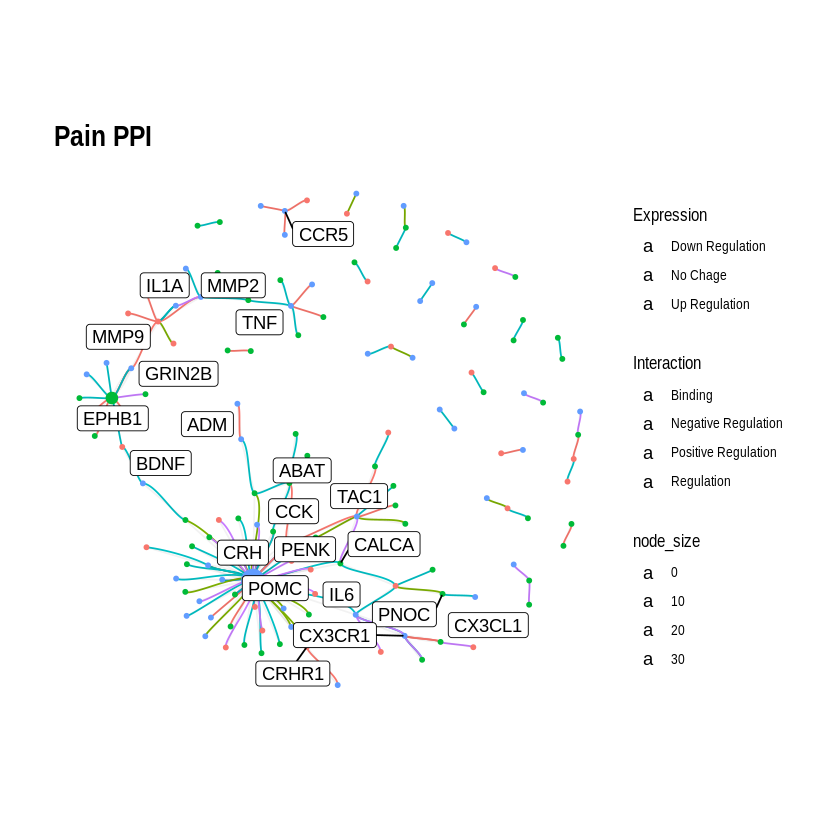

In [ ]:
network_ego1 %>%
    mutate(node_size = ifelse(degree_c >= 5, degree_c, 0)) %>%
    mutate(node_label = ifelse(degree_c >= 2, name, "")) %>%
    ggraph(layout = "nicely") + geom_edge_hive(aes(colour = Interaction)) + geom_edge_fan(alpha = 0.05) +
    geom_node_point(aes(color = Expression, size = node_size)) + geom_node_label(aes(label = node_label),
    max.overlaps = 1000, repel = T, show.legend = T) + coord_fixed() + theme_graph() +
    theme(legend.position = "right") + labs(title = "Pain PPI")

## Customize edge

In [ ]:
# Let's add information concerning the label we are going to add: angle,
# horizontal adjustement and potential flip calculate the ANGLE of the labels
nodes$id <- NA
nodes$id <- seq(1:137)
nodes$angle <- 90 - 360 * nodes$id/137
# calculate the alignment of labels: right or left If I am on the left part of
# the plot, my labels have currently an angle < -90
nodes$hjust <- ifelse(nodes$angle < -90, 1, 0)

# flip angle BY to make them readable
nodes$angle <- ifelse(nodes$angle < -90, nodes$angle + 180, nodes$angle)

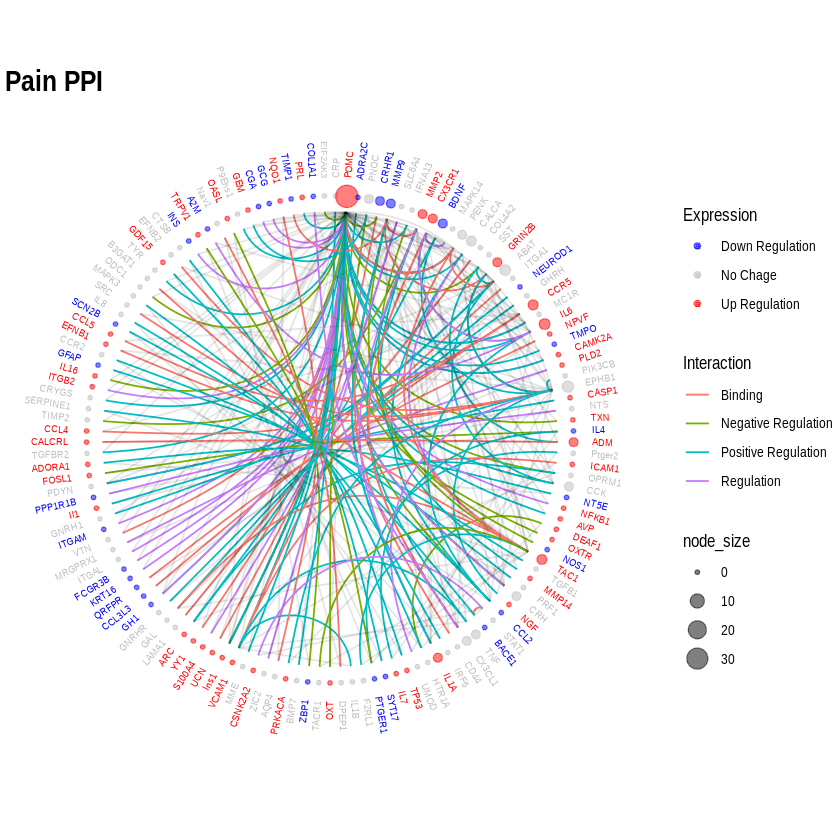

In [ ]:
network_ego1 %>%
    top_n(100, closeness_c) %>%
    mutate(node_size = ifelse(degree_c >= 2, degree_c, 0)) %>%
    ggraph(layout = "linear", circular = TRUE) + geom_edge_arc(aes(colour = Interaction)) +
    geom_edge_fan(alpha = 0) + geom_node_point(aes(colour = Expression, size = node_size,
    x = x * 1.07, y = y * 1.07), alpha = 0.5) + scale_color_manual(values = c("blue",
    "grey", "red")) + geom_node_text(aes(x = x * 1.15, y = y * 1.15, label = name,
    angle = nodes$angle, hjust = nodes$hjust, colour = Expression), size = 2, alpha = 1) +
    coord_fixed() + theme_graph() + theme(legend.position = "right", plot.margin = unit(c(0,
    0, 0, 0), "cm"), ) + expand_limits(x = c(-1.3, 1.3), y = c(-1.3, 1.3)) + labs(title = "Pain PPI")